### MY470 Computer Programming

### Final Assignment, MT 2017

#### \*\*\* Due 12:00 noon on Monday, January 15 \*\*\*

---
### Are status-equals more likely to get into fights?

The final assignment asks you to use the computational thinking and programming skills you learned in the course to answer an empirical social science question. You are expected to apply the best practices and theoretical concepts we covered in the course to produce a program that not only produces the correct output but is also legible, modular, and reasonably optimized. The assignment assumes mastery of loops, conditionals, and functions, as well as basic awareness of issues related to runtime performance.

In the assignment, we will study reverts on Wikipedia. A revert occurs when an editor undoes the changes made by another editor. We will first identify who reverted whom and when, then identify situations in which if $A$ reverted $B$, $B$ reverted $A$ within 24 hours, and finally compare the status difference between $A$ and $B$ to the expected status difference.


#### Hints

Some of the hints below point to one possible way of solving the problems but this is not necessarily the best one. The hints are not intended to stifle your creativity and ingenuity. Alternative approaches will be appreciated, as long as they are not more convoluted or slower.

Although this assignment is quite streamlined, imagine that the tasks here are part of a larger project. How would you structure your program if in the future you may need to manipulate the data differently, add additional analyses, or modify the focus of the current analysis? For example, consider placing helping functions in a separate file called `utils.py` or `tools.py`. These would be functions that you may need in different contexts and for different tasks. 

### Data

We will use data from the file `enwiki_2002.txt`. 
To data were originally obtained from the Wikipedia XML Dumps (https://dumps.wikimedia.org/mirrors.html) and include every article edit made on English Wikipedia since the online encyclopaedia was founded on January 15th, 2001 until the end of 2002. Each line in the file is an edit and includes the title of the edited article, the time when the edit was submitted, whether the edit was a revert, the version of the article, and the user who submitted the edit. To detect the article versions, a hash was calculated for the complete article text following each revision and the hashes were compared between edits. 

The table below describes the variables in the data:

| Variable   | Explanation   
|:-----------|:-------
| title      | title of the edited article               
| time       | time in the format YYYY-MM-DD HH:MM:SS when the edit was completed  
| revert     | 1 if the edit was detected to revert to a previous article version, 0 otherwise 
| version    | an integer indicating a unique state of the article, generally increasing over time; -1 indicates the article was empty (usually due to vandalism); if the same number appears more than once, then the article was exactly in the same state at these different time points  
| user       | the editor's username or if not logged in, the editor's IP address  


### 1. Who reverted whom?

Your goal is to create an edge list, where an edge goes from the editor who restored an earlier version of the article (the "reverter") to the editor who made the revision immediately after that version (the "reverted"). For every edge, you should know when it occured and what the "status" of the the reverter and the reverted were at this point in time.

We will ignore the article titles for the analyses so you don't need to save these.

In addition, you will need to clean up the self-reverts – we will not use them in the analyses here.

The measure of "status" we will use is related to seniority and activity. We will estimate status $s_i$ of editor $i$ as the base-ten logarithm of the number of edits $i$ has completed by the time of the revert under question. Transforming the number of edits with the logarithm makes sense because they follow a power-law distribution (the majority of individuals have very few edits, while a handful of individuals are responsible for most of the work). This operationalization allows to express the difference in status between two editors as the base-ten logarithm of the ratio of number of edits since $s_i - s_j = \log_{10} e_i - \log_{10} e_j = \log_{10} \frac{e_i}{e_j}$, where $e_i$ is the number of edits of editor $i$ and $e_j$ is the number of edits of editor $j$. In essence, we assume that an editor who has 10 edits compares to one with 100 edits the same way that an editor with 1,000 edits compares to one with 10,000. 

Save the edge data in a `pickle` file, which you will need for the next task.

#### Hints

Refer to the lab slides from Week 11 to find out about peculiarities in the data and useful modules that you should take into consideration.

There are multiple ways to save the network data. For example, you could use the networkx module or create your own network class but you are not expected to. For our purposes here, it will be sufficient to use a single list, or multiple lists, or a list and dictionaries, or just dictionaries. You should consider how you are going to use the data to decide on a reasonable data structure.

Keep different data manipulations in separate functions. 

Keep this code in a separate `.py` file and then import the functions in the code cell below to create and pickle the data. You will need to run the code only once as later you will use the pickled data directly and not need to do the data processing again and again. In addition, make sure your `.py` file has a proper `main()` function to allow to run it from the Terminal directly, not just from this notebook. 


In [1]:
## Option 1 - based on functions - please grade this one
## This Code run a few minutes....
## Run the edges_q1.py. at the end it returns a pickled edges DataFrame called "edges_df"
%run edges_q1.py

edges.py is runned from the terminal


In [2]:
## Option 2
# for more story-telling nature you can follow the Edges_Q1_Jupyter_Notebook.ipynb

In [3]:
#Showing the final DataFrame "edges_df"
with open ('edges_df', 'rb') as fr:
    edges_df = pickle.load(fr)
edges_df.head()

,Reverted,Reverter,Status_reverted,Status_reverter,Time
0,Conversion_script,Willsmith,4.426218,2.336460,2002-10-23 13:34:06
1,Jmallios,FvdP,0.000000,2.281033,2002-11-13 21:53:17
2,Ezra_Wax,Danny,2.130334,3.279895,2002-11-03 04:28:10
3,209.7.11.9,Koyaanis_Qatsi,0.000000,2.967080,2002-05-01 12:19:10
4,209.240.222.xxx,Dmerrill,1.431364,2.666518,2001-12-31 19:14:41


In [4]:
print("There are", len(edges_df), "reversions in the data")

There are 4992 reversions in the data


### 2. If $A$ reverted $B$, did $B$ revert $A$?

Temporal motifs are classes of event sequences that are similar not only in the topology but also in the temporal order of the events. Our aim is to identify the two-event temporal motifs in which after $A$ reverts $B$, $B$ reverts $A$ back ($AB–BA$). To identify the motifs, use the data you pickled in the previous task. Then look at every revert and identify if and when a response occurs, restricted to a time window of 24 hours. Ignore the article titles — we are agnostic as to whether the response happens in the same or in different articles. Further, it does not matter whether the response occurs immediately after the original revert or alternatively, the reverter and the reverted are involved in other reverts in-between the original revert and the response. If more than one response occurs within 24 hours, consider only the first one as part of the motif.

When you identify a motif, save information about the edges that allows you to identify them later. Save this information in a `pickle` file, which you will need for the next task.

#### Hints

If you have $AB_{t1}$, $BA_{t2}$, and $BA_{t3}$, all within 24 hours of each other, you should only count $AB_{t1}–BA_{t2}$ as a motif.

Note that with this definition, an edge can be part of up to two motifs. For example, for revert $BA_{t2}$, you can have $AB_{t1}–BA_{t2}$, as well as $BA_{t2}–AB_{t3}$ (the labels $A$ and $B$ are arbitrary). 

Keep this code in a separate `.py` file and then import the functions in the code cell below to create and pickle the data. You will need to run the code only once as later you will use the pickled data directly and not need to do the data processing again and again. In addition, make sure your `.py` file has a proper `main()` function to allow to run it from the Terminal directly, not just from this notebook. 

In [5]:
# Option 1 - based on functions - - please grade this one
#Run the motif_Q2.py. at the end it returns a pickled motif DataFrame called "motif_df"
%run motif_q2.py

motif_q2.py is runned from the terminal


In [6]:
## Option 2
# for more story-telling nature you can follow the Motif_Q2_Jupyter_Notebook.ipynb

In [7]:
## Showing the motif_df
with open ('motif_df', 'rb') as fr:
    motif_df = pickle.load(fr)
motif_df.head()

,Reverted,Reverter,Status_reverted,Status_reverter,Time,Reverted_hitback,Reverter_hitback,Status_reverted_hitback,Status_reverter_hitback
0,208.60.196.xxx,Anatoly_Vorobey,1.278754,1.477121,2001-11-04 02:15:54,Anatoly_Vorobey,208.60.196.xxx,1.477121,1.322219
1,Ed_Poor,200.191.188.xxx,2.465383,2.952308,2001-12-06 16:37:39,200.191.188.xxx,Ed_Poor,2.953760,2.480007
2,Ed_Poor,200.191.188.xxx,2.465383,2.954243,2001-12-06 17:08:41,200.191.188.xxx,Ed_Poor,2.953760,2.480007
3,David_Byron,Egern,0.903090,2.100371,2001-12-09 06:38:58,Egern,David_Byron,2.100371,1.113943
4,Egern,David_Byron,2.100371,1.113943,2001-12-09 07:01:33,David_Byron,Egern,1.113943,2.107210


In [8]:
print("There are", len(motif_df), "temporal motifs in the data")

There are 447 temporal motifs in the data


### 3. Are $A$ and $B$ more similar in status than expected?

Social comparison theory states that people strive to gain accurate self-evaluations and as a result, they tend to compare themselves to those who are similar. But since focus on relative performance heightens feelings of competitiveness, rivalry is stronger among similar individuals. This leads us to expect that the editors involved in the $AB–BA$ motif tend to be closer in status than expected.

To find evidence that retaliation is more likely among status-equals, we need to compare the status difference between ediotrs involved in $AB–BA$ motifs with the status difference between editors involved in any other type of revert.

To do this, use the data you pickled in the previous two tasks and the `matplotlib` library to plot a histogram of $s_A - s_B$ for reverts that are part of $AB–BA$ motifs on top of a histogram of $s_i - s_j$ for all other reverts. Then estimate the mean $s_A - s_B$ and the mean $s_i - s_j$ and print them. In a comment, use a couple of sentences to summarize what you observe.

#### Hints

Keep this code in a separate `.py` file and then import the functions in the code cell below to do the analysis and print and plot the results. Make sure your `.py` file has a proper `main()` function to allow to run it from the Terminal directly, not just from this notebook.



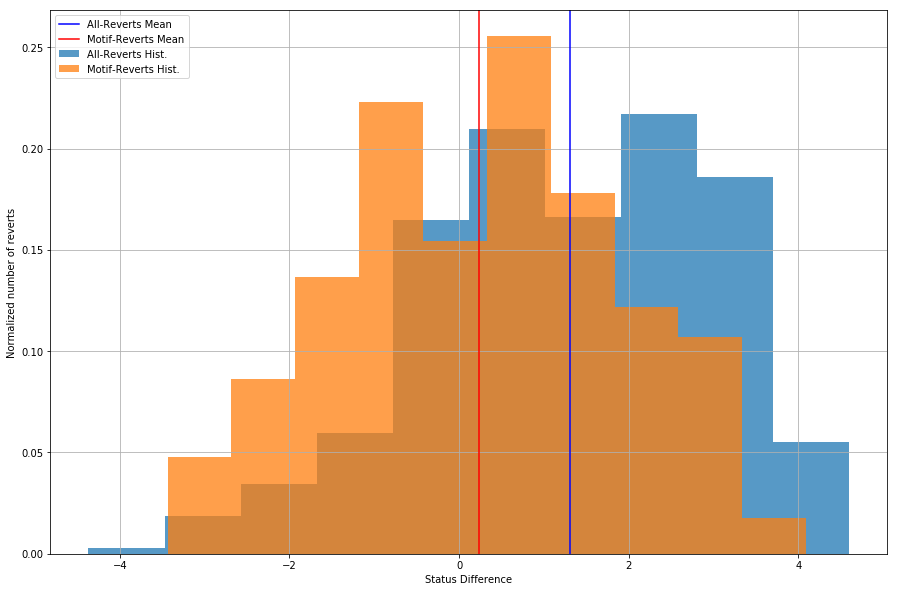

The status mean difference of all reverts is : 1.3038867692050895
The status mean difference of temporal reverts: 0.23722319291087038

graph_q3.py is runned from the terminal


In [9]:
#Option 1 - based on functions - - please grade this one
#Run the graph_q3.py. at the end it returns graph and prints out the means.
%run graph_q3.py

## Observations:

* The status mean difference of all reverts is significantly larger than the status mean difference of the temporal reverts(Motif-reverts).
* This result lead us to the conculsion that:
  * Editors involved in the $AB–BA$ motif tend to be closer in status than expected.
  * Rivalry is stronger among similar individuals.
* However, One also needs to take to account the high variance of the distribution of temporal reverts and the logarithic scale and because of these facts we cannot conclude that the average difference of status of temporal reverts is zero. But, for sure we can conclude that it is lower than the status mean of the all reverts

In [10]:
## Option 2
# for more story-telling nature you can follow the Graph_Q3_Jupyter_Notebook.ipynb

---

### Evaluation

| Aspect | Mark     | Comment   
|:-------:|:--------:|:----------------------
| Code runs      |   /40    |              
| Accuracy       |   /10    | 
| Legibility     |   /10    | 
| Modularity     |   /10    | 
| Minimal optimization      |   /10    | 
| More advanced optimization   |   /20    | 
|**Total**|**/100**  | 
